Case study on Unsupervised Learning

Do the following in the wine dataset.

#1. Read the dataset to the python environment.

#2. Try out different clustering models in the wine dataset.

#3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Load dataset
data=pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
AgglomerativeClustering   type         <class 'sklearn.cluster._<...>AgglomerativeClustering'>
KMeans                    type         <class 'sklearn.cluster._kmeans.KMeans'>
PCA                       ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
data                      DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np                        module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                        module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                       module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sch                       module       <module 'scipy.cluster.hi<...>\\cluster\\hierarchy.py'>
sns                       module       <module 'seaborn' from 'C<...>s\\seabo

In [5]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

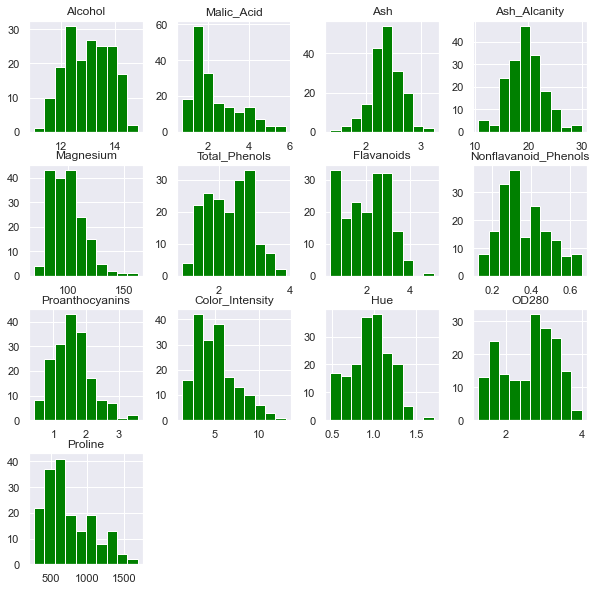

In [7]:
#visualizing data
sns.set()
data.hist(figsize=(10,10), color='green')
plt.show()

In [8]:
#processing-scaling data
scalar=StandardScaler()
scaled_data= scalar.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
pca=PCA(n_components=2)
components=pca.fit_transform(scaled_data)

In [10]:
#make copies of data
x=components
y=components

C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1282.1026695794808
628.7883507554774
259.50938075119325
192.3906153023484
155.06920474891697
123.0134950183353
99.24814548387026
90.33629680728116
81.7238527609987
72.66776068221805


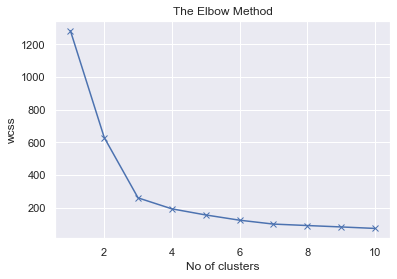

In [11]:
#Finding optimum number of clusters

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
#K-Means

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

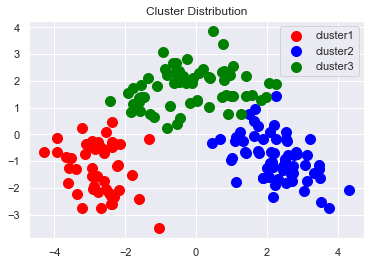

In [13]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.title('Cluster Distribution')
plt.legend()
plt.show()

In [32]:
data_kmeans=data
data_kmeans['cluster']=y_kmeans
data_kmeans.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [20]:
cluster1=data_kmeans[data_kmeans['cluster']==0]
cluster1['cluster'].count()

49

In [21]:
cluster1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.8,0.84,2.01,515,0
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560,0
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.0,0.78,1.29,600,0


In [24]:
cluster2=data_kmeans[data_kmeans['cluster']==1]
cluster2['cluster'].count()

64

In [25]:
cluster2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [26]:
cluster2=data_kmeans[data_kmeans['cluster']==2]
cluster2['cluster'].count()

65

In [27]:
cluster2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2


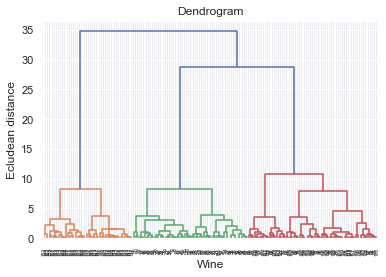

In [28]:
#Hierarchical Dendrogram plot for Wine dataset
#using the dendrogram to find the optimal no of clusters

dendrogram=sch.dendrogram(sch.linkage(y,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Ecludean distance')
plt.show()

In [29]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

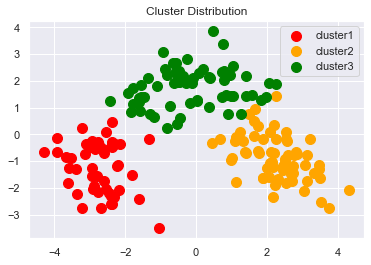

In [30]:
plt.scatter(y[y_kmeans==0,0],y[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(y[y_kmeans==1,0],y[y_kmeans==1,1],s=100,c='orange',label='cluster2')
plt.scatter(y[y_kmeans==2,0],y[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.title('Cluster Distribution')
plt.legend()
plt.show()

In [31]:
data_hc=data
data_hc['cluster']=y_hc
data_hc.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [34]:
cluster1=data_hc[data_hc['cluster']==0]
cluster1['cluster'].count()

49

In [35]:
cluster1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.8,0.84,2.01,515,0
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560,0
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.0,0.78,1.29,600,0


In [36]:
cluster2=data_hc[data_hc['cluster']==1]
cluster2['cluster'].count()

64

In [37]:
cluster2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [38]:
cluster3=data_hc[data_hc['cluster']==2]
cluster3['cluster'].count()

65

In [39]:
cluster3.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
